In [41]:
%matplotlib inline
import pandas
import os

path = "data/train_set/"

def find_files(path, substring):
    files = os.listdir(path)
    return sorted(path + f for f in files if substring in f)

power_files = find_files(path, "power")

def parse_date(c):
    return pandas.to_datetime(c.astype(int), unit="ms")

power_data = pandas.concat([pandas.read_csv(f, 
                             parse_dates=["ut_ms"], 
                             date_parser=parse_date,
                             index_col=0) for f in power_files])

power_data.describe()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
count,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,...,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06,5.402201e+06
mean,1.265718e-01,1.673596e-03,1.753386e-01,7.063870e-01,7.386059e-04,1.236624e-03,2.436808e-03,2.035755e-03,2.006293e-01,5.295355e-03,...,9.864580e-04,1.535510e-03,1.334152e-01,5.780211e-03,2.973559e-01,5.276393e-04,5.216509e-04,7.450369e-04,4.484993e-02,3.373378e-03
std,1.753571e-01,5.739167e-03,2.896129e-03,8.745314e-01,6.749120e-05,1.432615e-03,2.597007e-02,5.878030e-03,2.134436e-01,1.302760e-02,...,1.009873e-03,1.321280e-04,1.095240e-01,5.033459e-04,3.256682e-01,8.290170e-04,4.485661e-05,6.333928e-05,1.604208e-01,2.908105e-04
min,1.456800e-03,1.179110e-03,1.612890e-03,4.012400e-03,5.714290e-04,5.005000e-04,4.435560e-04,1.461600e-03,1.612890e-03,4.022180e-03,...,4.426670e-04,1.179110e-03,1.061600e-03,4.437780e-03,3.985600e-03,4.012000e-04,3.988000e-04,5.714290e-04,5.165500e-03,2.582000e-03
25%,1.821000e-03,1.473890e-03,1.721730e-01,5.015500e-03,7.142860e-04,6.256250e-04,5.544440e-04,1.827000e-03,2.016110e-03,5.027730e-03,...,5.533330e-04,1.473890e-03,2.388600e-03,5.547220e-03,6.976000e-02,5.015000e-04,4.985000e-04,7.142860e-04,6.456870e-03,3.227500e-03
50%,1.821000e-03,1.473890e-03,1.774400e-01,6.018600e-03,7.142860e-04,1.001000e-03,5.544440e-04,1.827000e-03,2.419330e-03,5.027730e-03,...,8.853330e-04,1.473890e-03,1.562960e-01,5.547220e-03,6.976000e-02,5.015000e-04,4.985000e-04,7.142860e-04,6.456870e-03,3.227500e-03
75%,3.738720e-01,1.473890e-03,1.774400e-01,1.112890e+00,7.142860e-04,1.001000e-03,5.544440e-04,1.827000e-03,4.302560e-01,5.027730e-03,...,9.960000e-04,1.473890e-03,1.615940e-01,5.547220e-03,5.680600e-01,6.018000e-04,4.985000e-04,7.142860e-04,7.748250e-03,3.227500e-03
max,3.791610e-01,3.311290e-01,1.827070e-01,2.215750e+00,8.571430e-04,6.247000e-03,4.099450e-01,3.329360e-01,4.355230e-01,2.164860e+00,...,1.695400e-01,2.653000e-03,3.311300e-01,6.656670e-03,1.465000e+00,1.116750e+00,5.982000e-04,8.571430e-04,7.336410e-01,3.873000e-03


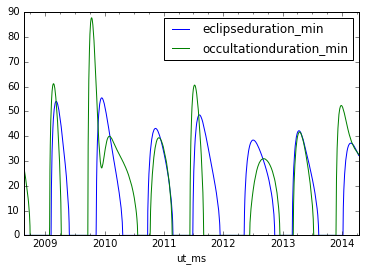

In [46]:
longterm_data = pandas.concat([pandas.read_csv(f, 
                             parse_dates=["ut_ms"], 
                             date_parser=parse_date,
                             index_col=0) for f in find_files(path, "ltdata")])


longterm_data[["eclipseduration_min", "occultationduration_min"]].plot()

In [113]:
lagged = longterm_data.rolling(7).mean().fillna(method="bfill")
longterm_data.merge(lagged, left_index=True, right_index=True, suffixes=("", "_rolling7")).head(50)

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,sunmars_km_rolling7,earthmars_km_rolling7,sunmarsearthangle_deg_rolling7,solarconstantmars_rolling7,eclipseduration_min_rolling7,occultationduration_min_rolling7
ut_ms,,,,,,,,,,,,
2008-08-22,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,2.415171e+08,3.573578e+08,19.038372,524.091837,0.850000,26.128571
2008-08-23,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333,2.415171e+08,3.573578e+08,19.038372,524.091837,0.850000,26.128571
2008-08-24,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333,2.415171e+08,3.573578e+08,19.038372,524.091837,0.850000,26.128571
2008-08-25,2.415193e+08,3.573744e+08,19.039052,524.080161,0.000000,26.100000,2.415171e+08,3.573578e+08,19.038372,524.091837,0.850000,26.128571
2008-08-26,2.413773e+08,3.578973e+08,18.863029,524.697233,0.000000,25.750000,2.415171e+08,3.573578e+08,19.038372,524.091837,0.850000,26.128571
2008-08-27,2.412341e+08,3.584118e+08,18.686667,525.320137,0.000000,25.250000,2.415171e+08,3.573578e+08,19.038372,524.091837,0.850000,26.128571
2008-08-28,2.410899e+08,3.589180e+08,18.509971,525.948863,0.000000,24.883333,2.415171e+08,3.573578e+08,19.038372,524.091837,0.850000,26.128571
2008-08-29,2.409446e+08,3.594157e+08,18.332947,526.583404,0.000000,24.400000,2.413751e+08,3.578806e+08,18.862354,524.708894,0.254762,25.700000
2008-08-30,2.407982e+08,3.599049e+08,18.155605,527.223752,0.000000,24.033333,2.412320e+08,3.583950e+08,18.686001,525.331782,0.000000,25.285714


In [87]:
event_data = pandas.concat([pandas.read_csv(f, 
                             parse_dates=["ut_ms"], 
                             date_parser=parse_date,
                             index_col=0) for f in find_files(path, "evtf")])

#event_data[event_data.description.str.contains("UMBRA")].description.value_counts()

def get_event_ranges(event_data, event_prefix):
    current_start = None
    event_ranges = []
    for date, row in event_data[event_data.description.str.startswith(event_prefix)].iterrows():
        if row["description"].endswith("_START"):
            current_start = date
        elif current_start:
            event_ranges.append({event_prefix: date - current_start})
            current_start = None
    return event_ranges

In [100]:
pandas.DataFrame(get_event_ranges(event_data, "MAR_PENUMBRA")).describe()

,MAR_PENUMBRA
count,3557
mean,0 days 00:32:26.122012
std,0 days 00:12:01.515291
min,0 days 00:00:30
25%,0 days 00:24:17
50%,0 days 00:34:16
75%,0 days 00:40:41
max,0 days 00:55:27


In [101]:
pandas.DataFrame(get_event_ranges(event_data, "MAR_UMBRA")).describe()

,MAR_UMBRA
count,3512
mean,0 days 00:32:12.287870
std,0 days 00:11:49.638575
min,0 days 00:01:13
25%,0 days 00:24:09.750000
50%,0 days 00:34:03
75%,0 days 00:40:20
max,0 days 00:54:45


In [16]:
import collections
col_counts = collections.Counter({col: power_data[col].mean() for col in power_data.columns}).most_common()
col_counts

[('NPWD2532', 1.2784544539416436),
 ('NPWD2451', 0.70638696960115044),
 ('NPWD2562', 0.41776833851835621),
 ('NPWD2551', 0.3514824066928644),
 ('NPWD2561', 0.32679764486951718),
 ('NPWD2851', 0.29735586700095001),
 ('NPWD2491', 0.20062931770559825),
 ('NPWD2771', 0.18702746065757272),
 ('NPWD2402', 0.17533859711581995),
 ('NPWD2722', 0.17143021160408523),
 ('NPWD2721', 0.13688889013260905),
 ('NPWD2802', 0.13341522482676968),
 ('NPWD2372', 0.12657178867261701),
 ('NPWD2791', 0.10721812037715052),
 ('NPWD2881', 0.044849927342612769),
 ('NPWD2531', 0.043983705005978126),
 ('NPWD2742', 0.013405408220475326),
 ('NPWD2821', 0.0057802114337378386),
 ('NPWD2501', 0.0052953547221308503),
 ('NPWD2552', 0.003969890813022319),
 ('NPWD2882', 0.003373378050076258),
 ('NPWD2481', 0.0024368076938512655),
 ('NPWD2482', 0.0020357552727119934),
 ('NPWD2401', 0.0016735955305568957),
 ('NPWD2801', 0.0015355098237033397),
 ('NPWD2472', 0.0012366238401949506),
 ('NPWD2792', 0.00098645796607530899),
 ('NPWD2

In [20]:
for col, _ in col_counts:
    power_data[col + "_rolling"] = power_data[col].rolling(window=50000, center=True).mean()


In [99]:
downsampled = power_data.resample("1D").mean()
reup = downsampled.reindex(power_data.index, method="pad")

# compute MSE
((power_data - reup) ** 2).mean(axis=0).mean() ** 0.5

0.21138528730226047

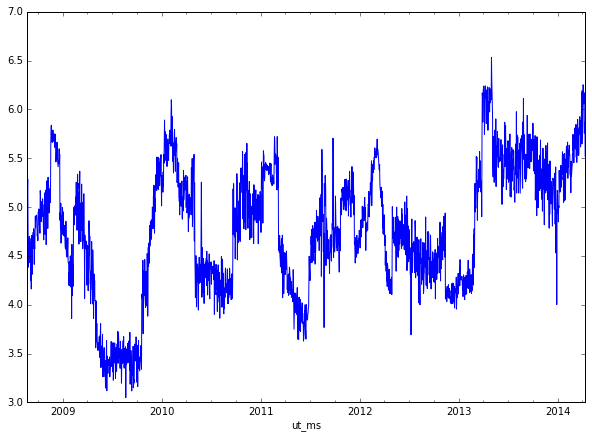

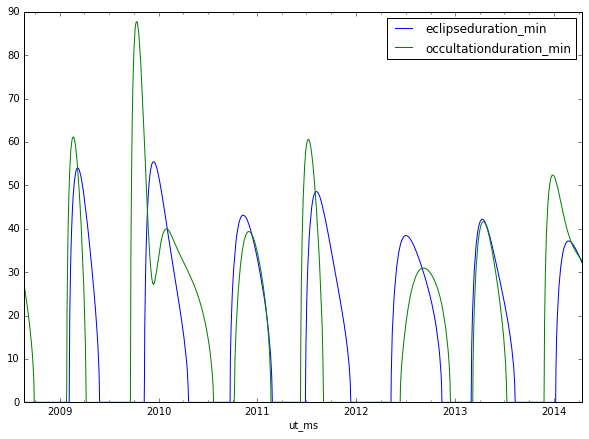

In [51]:
# for individual columns
#for col, _ in col_counts[0:5]:
#    power_data[col].resample("7D").mean().plot(figsize=(10, 7), label=col)

# sum totals
power_data.sum(axis=1).resample("1D").mean().plot(figsize=(10, 7))
longterm_data[["eclipseduration_min", "occultationduration_min"]].plot(figsize=(10, 7))

In [64]:
saa_data = pandas.read_csv("data/train_set/context--2008-08-22_2010-07-10--saaf.csv",
                          parse_dates=["ut_ms"],
                          date_parser=lambda c: pandas.to_datetime(c.astype(int), unit="ms"),
                          index_col=0)
saa_data.describe()

saa_data.reindex(power_data.index, method="nearest").describe()

,sa,sx,sy,sz
count,1.261290e+06,1.261290e+06,1.261290e+06,1.261290e+06
mean,6.392869e+00,2.622755e+01,8.949431e+01,1.083227e+02
std,1.444742e+01,1.881877e+01,1.316234e+01,2.175564e+01
min,0.000000e+00,0.000000e+00,9.700000e-01,9.300000e-01
25%,1.800000e-01,1.179000e+01,8.994000e+01,9.418000e+01
50%,4.400000e-01,2.637000e+01,9.009000e+01,1.096800e+02
75%,1.910000e+00,3.388000e+01,9.058000e+01,1.220000e+02
max,1.473700e+02,1.060400e+02,1.794300e+02,1.799400e+02


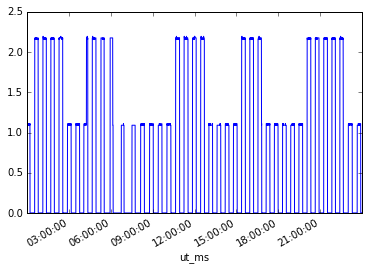

In [61]:
power_data['2008-10-02'].NPWD2451.plot()

In [4]:
power_data.drop(["ut_ms"], axis=1).corr("pearson")

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
NPWD2372,1.000000,0.017911,-0.000352,0.016304,0.000145,-0.000283,0.007462,-0.000231,0.018976,0.000120,...,-0.000489,-0.000599,0.046293,0.000065,0.018461,0.000342,-0.001860,-0.000202,-0.033805,-0.000428
NPWD2401,0.017911,1.000000,0.097125,0.004820,0.246017,0.097908,0.000423,0.151197,0.002051,0.071732,...,0.057767,0.068401,0.004992,0.092116,0.001523,0.011432,0.103618,0.141284,-0.002033,0.106547
NPWD2402,-0.000352,0.097125,1.000000,-0.006644,0.149811,0.190331,-0.000528,0.114527,-0.001108,0.126716,...,0.076916,0.140100,-0.000883,0.143022,0.002142,0.010433,0.174702,0.114746,-0.000436,0.196615
NPWD2451,0.016304,0.004820,-0.006644,1.000000,0.009413,0.022663,0.015148,0.023318,0.026233,0.021714,...,0.004044,0.004413,0.085448,0.004468,0.165640,-0.000794,0.005142,0.005110,-0.027295,0.006293
NPWD2471,0.000145,0.246017,0.149811,0.009413,1.000000,0.076436,0.000823,0.164373,0.002987,0.103605,...,0.075536,0.067361,0.004234,0.081258,0.001953,0.014031,0.142626,0.148423,0.000656,0.143732
NPWD2472,-0.000283,0.097908,0.190331,0.022663,0.076436,1.000000,0.001846,0.095749,0.004010,0.112711,...,0.097920,0.115943,0.006678,0.110972,0.007780,0.005983,0.171546,0.054917,-0.001399,0.256318
NPWD2481,0.007462,0.000423,-0.000528,0.015148,0.000823,0.001846,1.000000,0.002528,0.026677,0.002011,...,0.000747,0.000617,0.041430,0.001048,0.021057,0.000002,0.002060,0.000674,-0.010128,0.000374
NPWD2482,-0.000231,0.151197,0.114527,0.023318,0.164373,0.095749,0.002528,1.000000,0.004195,0.132759,...,0.042231,0.097893,0.006897,0.117789,0.008902,0.019421,0.124889,0.260996,-0.000980,0.071424
NPWD2491,0.018976,0.002051,-0.001108,0.026233,0.002987,0.004010,0.026677,0.004195,1.000000,-0.017110,...,0.001503,0.002080,0.033093,0.000757,0.016548,0.000012,0.000613,0.001490,-0.029116,0.000993
NPWD2501,0.000120,0.071732,0.126716,0.021714,0.103605,0.112711,0.002011,0.132759,-0.017110,1.000000,...,0.052859,0.239539,0.007485,0.248961,0.011914,0.010604,0.248978,0.139547,-0.003769,0.131935


In [64]:
# join the data sources and correlate

data = pandas.concat([power_data, longterm_data.reindex(power_data.index, method="nearest")], axis=1)
data.corr("spearman")

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2871,NPWD2872,NPWD2881,NPWD2882,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
NPWD2372,1.000000,0.090643,0.051543,0.020240,0.054288,0.049283,0.048961,0.103865,0.063171,0.040753,...,0.033563,0.088521,0.036379,0.023066,0.038086,-0.016085,-0.015489,-0.038086,-0.008983,-0.016558
NPWD2401,0.090643,1.000000,0.115027,0.082179,0.273926,0.024471,0.100443,0.185760,0.085721,0.097930,...,0.125444,0.165585,0.216993,0.131187,-0.009953,0.005572,-0.015899,0.009953,0.012295,0.002762
NPWD2402,0.051543,0.115027,1.000000,0.045936,0.148535,0.069125,0.123864,0.123552,0.065112,0.135002,...,0.181642,0.121271,0.127167,0.202375,-0.007612,0.003162,-0.001403,0.007612,0.005305,0.004657
NPWD2451,0.020240,0.082179,0.045936,1.000000,0.102085,0.063202,0.048451,0.066118,0.037363,0.050226,...,0.053645,0.050758,0.073721,0.058294,0.063606,-0.004037,-0.082567,-0.063606,0.087427,0.053453
NPWD2471,0.054288,0.273926,0.148535,0.102085,1.000000,0.012960,0.110071,0.172095,0.101383,0.107634,...,0.146616,0.158673,0.245169,0.152419,-0.012379,0.006305,-0.017285,0.012379,0.012404,0.006752
NPWD2472,0.049283,0.024471,0.069125,0.063202,0.012960,1.000000,0.027708,0.051907,0.035148,0.084982,...,0.082546,0.044343,0.008406,0.071605,0.017704,-0.010854,-0.062229,-0.017704,0.029557,-0.092362
NPWD2481,0.048961,0.100443,0.123864,0.048451,0.110071,0.027708,1.000000,0.084393,0.053099,0.274359,...,0.239714,0.128046,0.070040,0.134596,-0.007946,0.015193,-0.021814,0.007946,0.003182,-0.000516
NPWD2482,0.103865,0.185760,0.123552,0.066118,0.172095,0.051907,0.084393,1.000000,0.024206,0.155947,...,0.138087,0.290432,0.119425,0.082789,-0.011159,0.006212,-0.015262,0.011159,0.017708,0.007231
NPWD2491,0.063171,0.085721,0.065112,0.037363,0.101383,0.035148,0.053099,0.024206,1.000000,0.018453,...,0.046744,0.038800,0.071513,0.062508,0.042495,-0.008652,-0.023959,-0.042495,0.009368,-0.003215
NPWD2501,0.040753,0.097930,0.135002,0.050226,0.107634,0.084982,0.274359,0.155947,0.018453,1.000000,...,0.268224,0.151332,0.069606,0.146265,-0.010853,0.007504,-0.018852,0.010853,0.012746,0.007421


In [96]:
dmop_data = pandas.concat([pandas.read_csv(f, 
                             parse_dates=["ut_ms"], 
                             date_parser=parse_date,
                             index_col=0) for f in find_files(path, "dmop")])

dmop_data["dummy"] = 1
pandas.rolling(window=50000).count()

/Users/keith/code/mars-express/venv/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_count is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50000).count()


ut_ms
2008-08-22 00:00:11        1.0
2008-08-22 00:28:29        2.0
2008-08-22 00:28:34        3.0
2008-08-22 00:28:39        4.0
2008-08-22 00:28:44        5.0
2008-08-22 00:40:15        6.0
2008-08-22 00:47:15        7.0
2008-08-22 00:57:15        8.0
2008-08-22 01:09:41        9.0
2008-08-22 01:37:41       10.0
2008-08-22 01:39:41       11.0
2008-08-22 01:41:41       12.0
2008-08-22 01:41:46       13.0
2008-08-22 01:41:51       14.0
2008-08-22 01:41:56       15.0
2008-08-22 01:44:41       16.0
2008-08-22 01:44:46       17.0
2008-08-22 01:44:51       18.0
2008-08-22 01:44:56       19.0
2008-08-22 01:45:01       20.0
2008-08-22 01:45:06       21.0
2008-08-22 01:45:11       22.0
2008-08-22 01:45:16       23.0
2008-08-22 01:45:21       24.0
2008-08-22 01:45:26       25.0
2008-08-22 01:45:31       26.0
2008-08-22 01:45:36       27.0
2008-08-22 01:45:41       28.0
2008-08-22 01:45:46       29.0
2008-08-22 01:45:51       30.0
                        ...   
2014-04-13 20:31:31    50000.0
20